In [1]:
import numpy as np
import pandas as pd

In [2]:
try:
  df = pd.read_csv('Cars Datasets 2025.csv', encoding='latin-1')
except UnicodeDecodeError:
  print("UnicodeDecodeError: Could not decode the file with 'latin-1' encoding. Please try a different encoding or inspect the file for problematic characters.")

In [3]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


In [5]:
df.shape

(1218, 11)

In [6]:
df.describe()


,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
count,1218,1218,1218,1215,1218,1218,1212,1218,1218,1218,1217
unique,37,1201,356,311,456,114,180,535,23,19,263
top,Nissan,Mistral,I4,1984 cc,355 hp,250 km/h,6.5 sec,"$35,000",Petrol,5,400 Nm
freq,149,2,64,31,23,145,45,36,871,692,72


In [7]:
df.isnull().sum()


,0
Company Names,0
Cars Names,0
Engines,0
CC/Battery Capacity,3
HorsePower,0
Total Speed,0
Performance(0 - 100 )KM/H,6
Cars Prices,0
Fuel Types,0
Seats,0


In [8]:
df.duplicated().sum()


np.int64(4)

In [9]:
df_info = df.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 850.1 KB


In [10]:
df['Fuel Types'].unique()

array(['plug in hyrbrid', 'Petrol', 'Diesel', 'Hybrid', 'Electric',
       'Petrol/Diesel', 'Plug-in Hybrid', 'Petrol/AWD', 'Petrol/Hybrid',
       'Hydrogen', 'Diesel/Petrol', 'Petrol/EV', 'Hybrid/Electric',
       'Petrol, Hybrid', 'Petrol, Diesel', 'Hybrid (Petrol)',
       'CNG/Petrol', 'Hybrid/Petrol', 'Diesel Hybrid', 'Petrol (Hybrid)',
       'Hybrid (Gas + Electric)', 'Gas / Hybrid', 'Hybrid / Plug-in'],
      dtype=object)

In [11]:
df.dropna(inplace=True)


In [12]:
df.columns

Index(['Company Names', 'Cars Names', 'Engines', 'CC/Battery Capacity',
       'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices',
       'Fuel Types', 'Seats', 'Torque'],
      dtype='object')

In [13]:
print(df.columns.tolist())


['Company Names', 'Cars Names', 'Engines', 'CC/Battery Capacity', 'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices', 'Fuel Types', 'Seats', 'Torque']


In [14]:
# Clean column names: remove spaces and make lowercase
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns.tolist())  # Check again after cleaning


['company_names', 'cars_names', 'engines', 'cc/battery_capacity', 'horsepower', 'total_speed', 'performance(0_-_100_)km/h', 'cars_prices', 'fuel_types', 'seats', 'torque']


In [15]:
df['engines'] = df['engines'].str.replace(' cc', '', regex=False)

In [16]:
df.dtypes


,0
company_names,object
cars_names,object
engines,object
cc/battery_capacity,object
horsepower,object
total_speed,object
performance(0_-_100_)km/h,object
cars_prices,object
fuel_types,object
seats,object


In [17]:
df['fuel_types'].value_counts()


,count
fuel_types,
Petrol,871
Diesel,102
Electric,95
Hybrid,79
Petrol/Diesel,16
Petrol/Hybrid,16
Plug-in Hybrid,5
Hybrid (Petrol),4
Diesel/Petrol,4


In [18]:
df['fuel_types'].unique()


array(['plug in hyrbrid', 'Petrol', 'Diesel', 'Hybrid', 'Electric',
       'Petrol/Diesel', 'Plug-in Hybrid', 'Petrol/AWD', 'Petrol/Hybrid',
       'Hydrogen', 'Diesel/Petrol', 'Petrol/EV', 'Hybrid/Electric',
       'Petrol, Hybrid', 'Petrol, Diesel', 'Hybrid (Petrol)',
       'CNG/Petrol', 'Hybrid/Petrol', 'Hybrid (Gas + Electric)',
       'Gas / Hybrid', 'Hybrid / Plug-in'], dtype=object)

In [19]:
df['fuel_types'] = df['fuel_types'].str.strip().str.lower()


In [20]:
df[['cars_prices', 'engines']].describe()


,cars_prices,engines
count,1210,1210
unique,533,350
top,"$35,000",I4
freq,36,64


In [21]:
# Remove '$' and ',' from 'cars_prices' and convert to numeric
df['cars_prices'] = df['cars_prices'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['cars_prices'] = pd.to_numeric(df['cars_prices'], errors='coerce')

# Filter the DataFrame based on the numeric 'cars_prices'
df = df[(df['cars_prices'] > 100000) & (df['cars_prices'] < 10000000)]

<Axes: ylabel='cars_prices'>

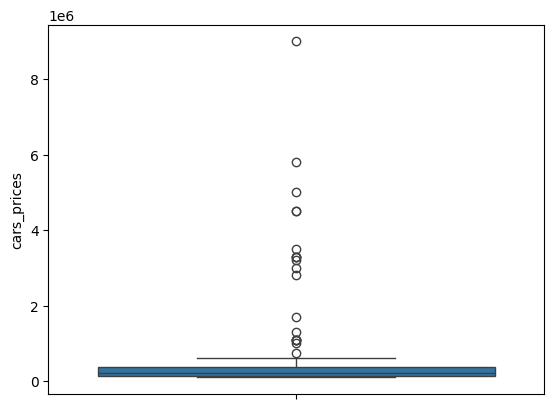

In [22]:
import seaborn as sns
sns.boxplot(df['cars_prices'])


In [23]:
df.reset_index(drop=True, inplace=True)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   company_names              198 non-null    object 
 1   cars_names                 198 non-null    object 
 2   engines                    198 non-null    object 
 3   cc/battery_capacity        198 non-null    object 
 4   horsepower                 198 non-null    object 
 5   total_speed                198 non-null    object 
 6   performance(0_-_100_)km/h  198 non-null    object 
 7   cars_prices                198 non-null    float64
 8   fuel_types                 198 non-null    object 
 9   seats                      198 non-null    object 
 10  torque                     198 non-null    object 
dtypes: float64(1), object(10)
memory usage: 17.1+ KB


In [25]:
df.isnull().sum()

,0
company_names,0
cars_names,0
engines,0
cc/battery_capacity,0
horsepower,0
total_speed,0
performance(0_-_100_)km/h,0
cars_prices,0
fuel_types,0
seats,0


In [26]:
df.head()

,company_names,cars_names,engines,cc/battery_capacity,horsepower,total_speed,performance(0_-_100_)km/h,cars_prices,fuel_types,seats,torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,1100000.0,plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,460000.0,petrol,5,900 Nm
2,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,161000.0,petrol,4,900 Nm
3,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,253290.0,petrol,2,560 Nm
4,BMW,Mclaren 720s,V8,"3,994 cc",710 hp,341 km/h,2.9 sec,499000.0,petrol,2,770 Nm


In [27]:
df.to_csv('Cars Datasets 2025.csv', index=False)


In [28]:
card = df.nunique().sort_values(ascending=False)
print("🔹 Column Cardinality (unique values):")
print(card)

🔹 Column Cardinality (unique values):
cars_names                   197
cars_prices                  149
horsepower                    95
performance(0_-_100_)km/h     58
torque                        56
total_speed                   54
cc/battery_capacity           49
engines                       40
company_names                 22
seats                          7
fuel_types                     6
dtype: int64


In [29]:
likely_cols = ["price","year","km_driven","mileage","engine","max_power",
               "fuel","transmission","owner","seats","name","company","model","seller_type","location","city"]
present = [c for c in likely_cols if c in df.columns.str.lower().tolist() or c in df.columns.tolist()]
print("🔹 Likely car-related columns present:", present)

# If common target column casing differs (like 'Price' vs 'price'), show a hint
targets = [c for c in df.columns if c.lower() in ["price","selling_price"]]
if targets:
    print("🎯 Potential target column:", targets)
else:
    print("⚠️ Target (price) column not clearly found — check column names carefully.")

🔹 Likely car-related columns present: ['seats']
⚠️ Target (price) column not clearly found — check column names carefully.


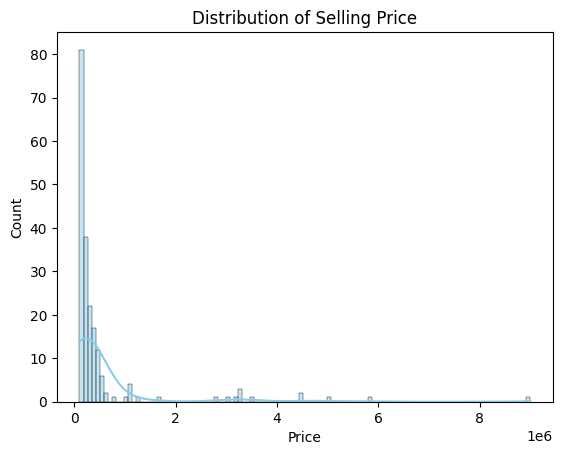

In [30]:
import matplotlib.pyplot as plt
sns.histplot(df['cars_prices'], kde=True, color='skyblue')
plt.title("Distribution of Selling Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

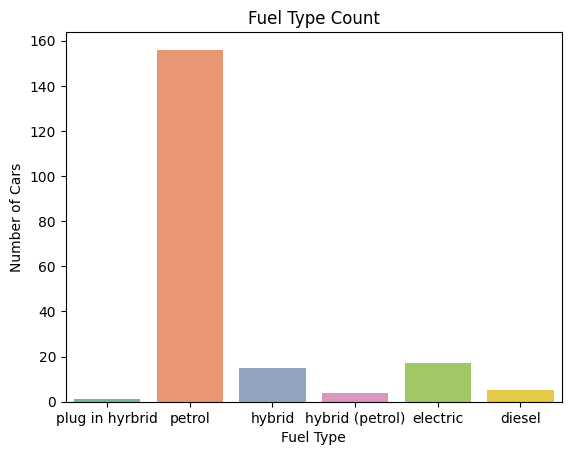

In [31]:
sns.countplot(x='fuel_types', data=df, hue='fuel_types', palette='Set2', legend=False)
plt.title("Fuel Type Count")
plt.xlabel("Fuel Type")
plt.ylabel("Number of Cars")
plt.show()

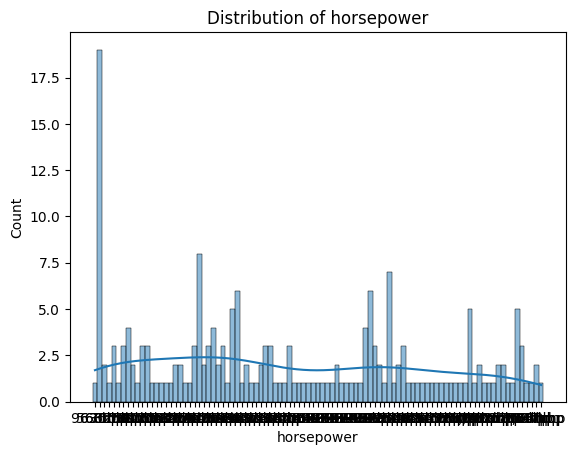

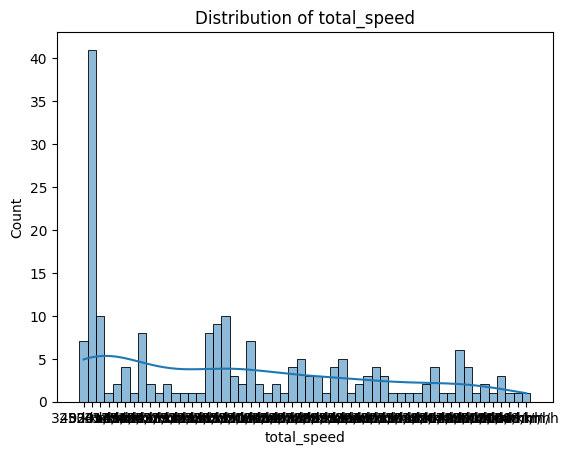

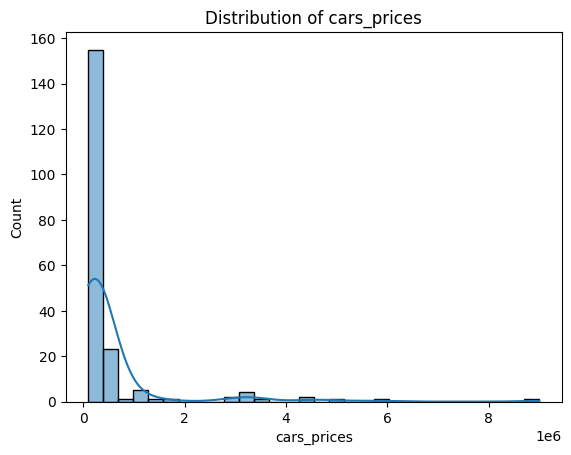

In [32]:
for col in ['horsepower', 'total_speed', 'cars_prices']:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

/tmp/ipython-input-1755509204.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')


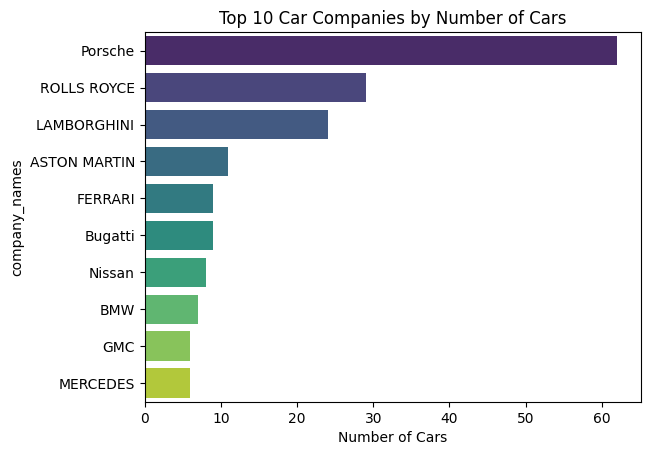

In [33]:
# Use the DataFrame before one-hot encoding of company_names for plotting
top_companies = df['company_names'].value_counts().head(10)
plt.figure()
sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')
plt.title('Top 10 Car Companies by Number of Cars')
plt.xlabel('Number of Cars')
plt.show()

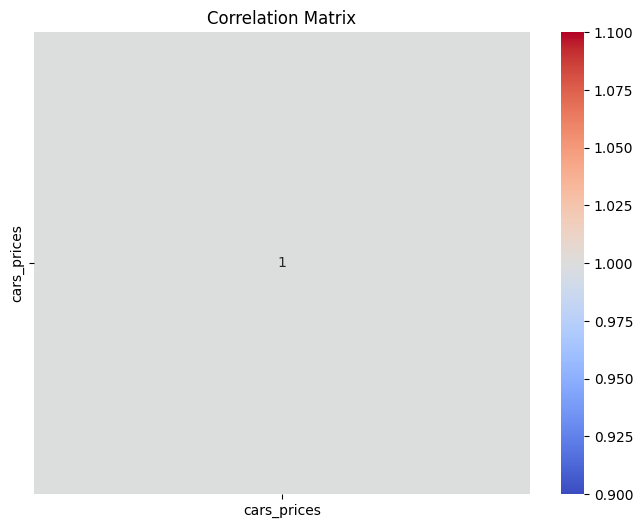

In [34]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()




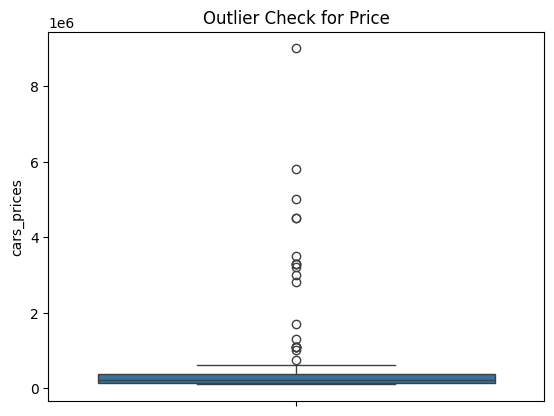

In [35]:
sns.boxplot(df['cars_prices'])
plt.title("Outlier Check for Price")
plt.show()

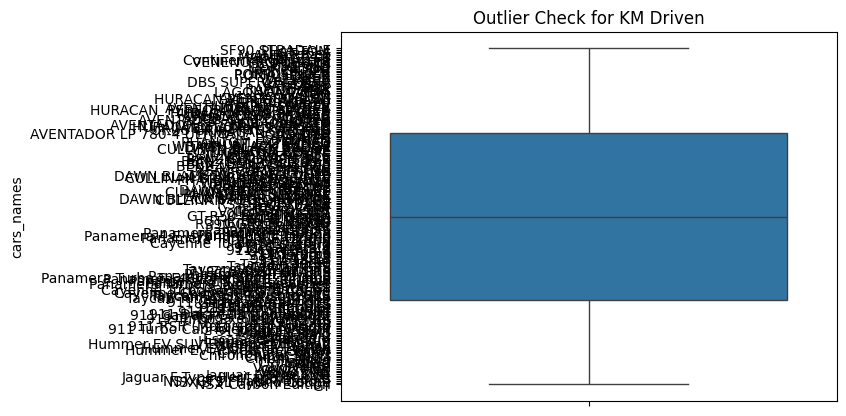

In [36]:
sns.boxplot(df['cars_names'])
plt.title("Outlier Check for KM Driven")
plt.show()


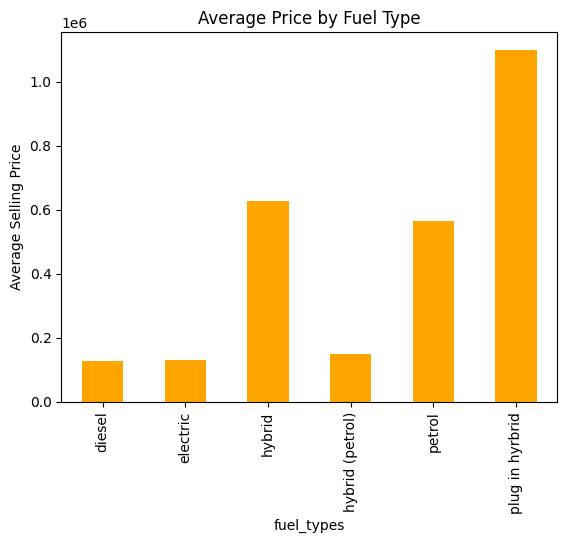

In [37]:
df.groupby('fuel_types')['cars_prices'].mean().plot(kind='bar', color='orange')
plt.title("Average Price by Fuel Type")
plt.ylabel("Average Selling Price")
plt.show()


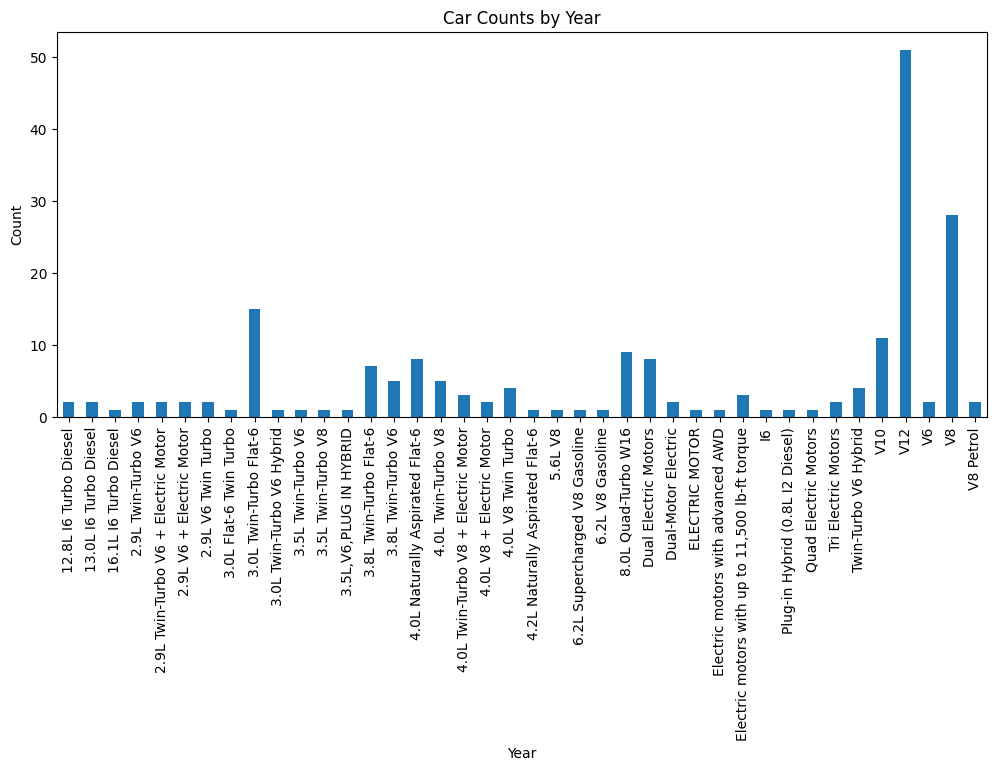

In [38]:
df['engines'].value_counts().sort_index().plot(kind='bar', figsize=(12,5))
plt.title("Car Counts by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


In [39]:
df.drop('cars_names', axis=1, inplace=True)


In [40]:
# Apply one-hot encoding to the 'company_names' column
df = pd.get_dummies(df, columns=['company_names'], drop_first=True)

X = df.drop('cars_prices', axis=1)
y = df['cars_prices']

In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['fuel_types'] = le.fit_transform(df['fuel_types'])

In [42]:
df = pd.get_dummies(df, columns=['fuel_types'], drop_first=True)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['year', 'km_driven', 'mileage_(kmpl)', 'engine_(cc)']


In [44]:
X = df.drop('cars_prices', axis=1)
y = df['cars_prices']


In [45]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid changes in original dataframe accidentally
df_encoded = df.copy()

# Encode all object type columns
le = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Now split features and target
X = df_encoded.drop('cars_prices', axis=1)  # apne target column ka exact naam yahan rakho
y = df_encoded['cars_prices']

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
X_test

,engines,cc/battery_capacity,horsepower,total_speed,performance(0_-_100_)km/h,seats,torque,company_names_AUDI,company_names_Acura,company_names_BENTLEY,...,company_names_ROLLS ROYCE,company_names_TOYOTA,company_names_Tesla,company_names_Volkswagen,company_names_Volvo,fuel_types_1,fuel_types_2,fuel_types_3,fuel_types_4,fuel_types_5
65,38,18,57,8,25,4,51,False,False,False,...,False,False,False,False,False,False,False,False,True,False
114,7,11,10,19,41,3,14,False,False,False,...,False,False,False,False,False,False,False,False,True,False
16,37,16,55,33,17,3,30,False,False,False,...,False,False,False,False,False,False,False,False,True,False
141,16,29,20,12,45,3,27,False,False,False,...,False,False,False,False,False,False,False,False,True,False
156,8,11,24,30,21,3,25,False,False,False,...,False,False,False,False,False,False,False,False,True,False
126,25,48,85,9,15,3,5,False,False,False,...,False,False,False,False,False,True,False,False,False,False
140,17,29,73,20,28,3,54,False,False,False,...,False,False,False,False,False,False,True,False,False,False
30,35,33,68,38,17,1,26,False,False,False,...,False,False,False,False,False,False,False,False,True,False
18,38,21,2,48,10,1,3,False,False,False,...,False,False,False,False,False,False,True,False,False,False
167,33,0,0,10,12,5,1,False,False,False,...,False,False,True,False,False,True,False,False,False,False


In [48]:
X_train

,engines,cc/battery_capacity,horsepower,total_speed,performance(0_-_100_)km/h,seats,torque,company_names_AUDI,company_names_Acura,company_names_BENTLEY,...,company_names_ROLLS ROYCE,company_names_TOYOTA,company_names_Tesla,company_names_Volkswagen,company_names_Volvo,fuel_types_1,fuel_types_2,fuel_types_3,fuel_types_4,fuel_types_5
137,16,29,47,29,32,3,47,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,38,18,70,32,29,1,36,False,False,False,...,False,False,False,False,False,False,False,False,True,False
66,38,18,57,8,41,4,51,False,False,False,...,False,False,False,False,False,False,False,False,True,False
138,3,10,18,16,38,3,22,False,False,False,...,False,False,False,False,False,False,False,False,True,False
104,6,10,17,16,44,3,22,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,19,29,23,22,35,3,27,False,False,False,...,False,False,False,False,False,False,False,False,True,False
14,38,17,60,35,21,2,44,False,False,False,...,False,False,False,False,False,False,False,False,True,False
92,38,19,52,25,29,4,47,True,False,False,...,False,False,False,False,False,False,False,False,True,False
179,24,46,5,52,9,1,8,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [49]:
y_test

,cars_prices
65,104000.0
114,110000.0
16,113000.0
141,111200.0
156,145300.0
126,185000.0
140,167800.0
30,261000.0
18,1100000.0
167,113490.0


In [50]:
y_train

,cars_prices
137,290000.0
5,193440.0
66,113000.0
138,105000.0
104,105000.0
...,...
106,130000.0
14,220000.0
92,109000.0
179,3500000.0


In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 4. Model train karein
model.fit(X_train, y_train)

# 5. Prediction karein
y_pred = model.predict(X_test)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 202258.02641708124
Mean Squared Error (MSE): 73187281427.59326
Root Mean Squared Error (RMSE): 270531.47955015005
R² Score: -1.4729498216624717


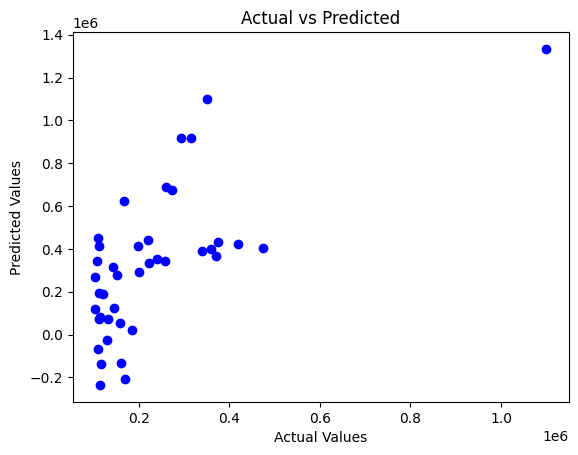

In [53]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

In [54]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 1447505.578676122
Coefficients: [-3.37175778e+04  2.75723984e+04 -5.05521237e+03  4.10528414e+03
 -9.73407628e+03 -2.61056261e+04  5.28809820e+03 -4.20126716e+05
 -9.00409947e+05 -2.04047978e+05 -4.00841824e+05  2.50273824e+06
 -1.08117104e+06 -5.81609182e+04 -8.62808900e+05  3.03624412e+05
 -7.06858504e+05 -2.48975145e+05 -5.94106034e+04  2.32830644e-10
 -1.12656166e+06 -1.20797833e+06 -4.40153020e+05 -4.73079643e+05
 -6.24809323e+05 -2.60911624e+05 -1.68647786e+06 -1.22078418e+06
 -1.08177108e+05  5.09250660e+05  4.05123780e+05  5.04859220e+02
  4.14081990e+05]


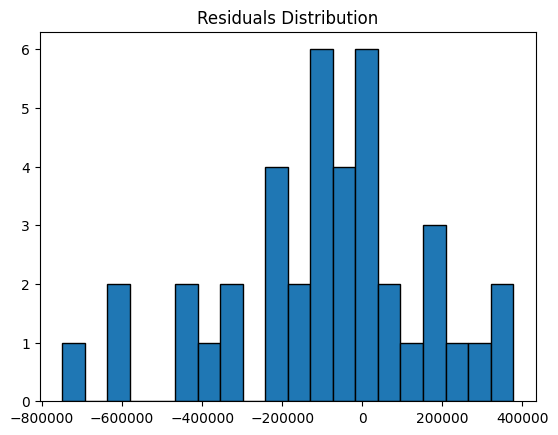

In [55]:
residuals = y_test - y_pred
plt.hist(residuals, bins=20, edgecolor='black')
plt.title("Residuals Distribution")
plt.show()


In [56]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators=200,   # Trees ka count
    max_depth=10,       # Har tree ki max depth
    random_state=42
)

# 4. Model train karo
rf_model.fit(X_train, y_train)

# 5. Prediction
y_pred = rf_model.predict(X_test)

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Random Forest Regressor Performance:
Mean Absolute Error (MAE): 130412.12
Mean Squared Error (MSE): 164269189107.33
Root Mean Squared Error (RMSE): 405301.36
R² Score: -4.5505


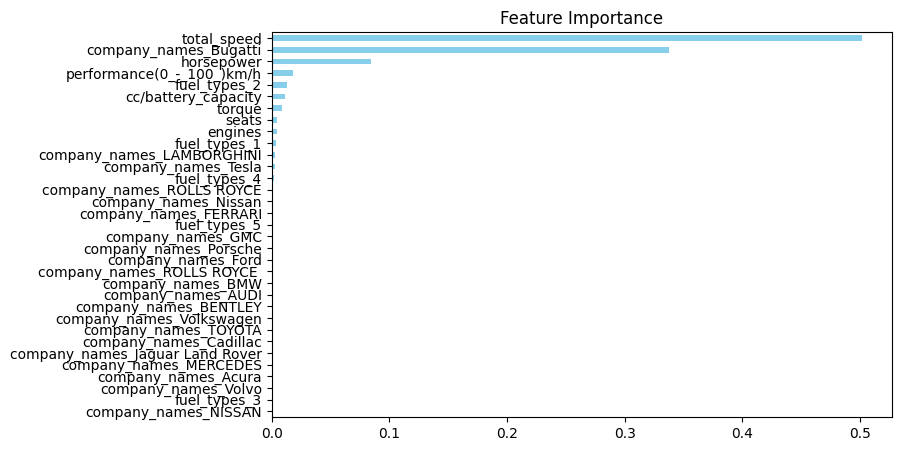

In [58]:
import matplotlib.pyplot as plt
importance = rf_model.feature_importances_
feat_importances = pd.Series(importance, index=X_train.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8, 5), color='skyblue')
plt.title("Feature Importance")
plt.show()

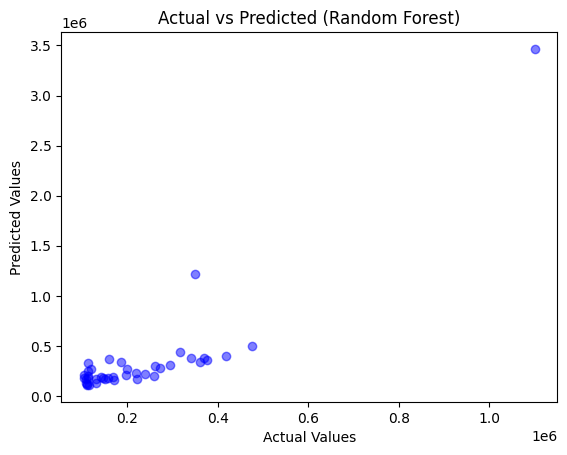

In [59]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()

In [60]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [3, 5, 7], 'n_estimators': [100, 200, 300]}
grid = GridSearchCV(RandomForestRegressor(), params, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Params: {'max_depth': 5, 'n_estimators': 100}
Best Score: 0.6657102600355954


In [64]:
import pickle
# 1️⃣ Linear Regression model save karo
pickle.dump(model, open("lr_car_model.pkl", "wb"))

# 2️⃣ Random Forest Regressor model save karo
pickle.dump(rf_model, open("rf_car_model.pkl", "wb"))

print("Both models saved successfully!")

Both models saved successfully!
